In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def computercost(X,Y,w):
    temp = np.power((X.dot(w.T)-Y),2)
    temp = np.sum(temp)
    temp = temp / (2*len(X))
    
    return temp

In [3]:
def gradientDescent(X,Y,w,lr,iter):
    cost = np.zeros(iter)
    for i in range(iter):

        temp = X.dot(w.T) - Y

        # for j in range(int(w.shape[1])):

        #     temp_new = np.multiply(temp,X[:,j])

        #     w[0,j] = w[0,j] - lr / len(X) * np.sum(temp_new) 

        #向量化
        
        temp_new = X.T.dot(temp)

        w = w - lr / len(X) * temp_new.reshape(1,-1)
        
        cost[i] = computercost(X,Y,w)
    
    return w,cost

In [4]:
path = 'ex1data2.txt'
data = pd.read_csv(path,names=['size','bathroom','price'])
data.head()
data.describe()

,size,bathroom,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [5]:
means = data.mean().values
stds = data.std().values
means

array([2.00068085e+03, 3.17021277e+00, 3.40412660e+05])

In [6]:
data = (data - data.mean()) / data.std()
data.head()

,size,bathroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [7]:
data.insert(0,'b',1)
data.head()

,b,size,bathroom,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [8]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
Y = data.iloc[:,cols-1:cols]
X = np.matrix(X.values)
Y = np.matrix(Y.values)
w = np.matrix([0,0,0])
w = np.float64(w)


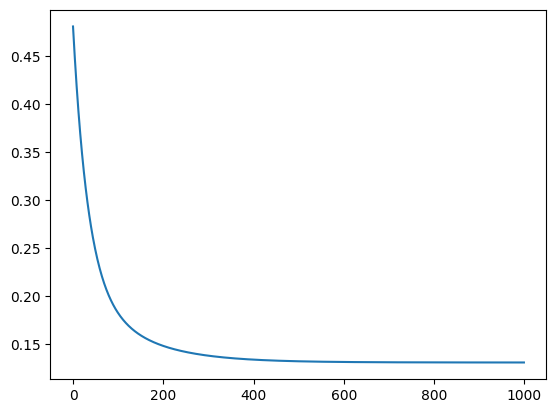

In [9]:
w,cost = gradientDescent(X,Y,w,0.01,1000)

plt.plot(np.arange(1000),cost)
plt.show()

In [10]:
w = np.array(w.reshape(-1, 1))
means = means.reshape(-1, 1)
stds = stds.reshape(-1, 1)


In [11]:
w,means,stds

(array([[-1.10980964e-16],
        [ 8.78503652e-01],
        [-4.69166570e-02]]),
 array([[2.00068085e+03],
        [3.17021277e+00],
        [3.40412660e+05]]),
 array([[7.94702354e+02],
        [7.60981887e-01],
        [1.25039900e+05]]))

In [12]:
means[:-1]

array([[2000.68085106],
       [   3.17021277]])

In [13]:
w[1:]

array([[ 0.87850365],
       [-0.04691666]])

In [14]:
stds[:-1]

array([[7.94702354e+02],
       [7.60981887e-01]])

In [15]:
w[0]

array([-1.10980964e-16])

In [16]:
w

array([[-1.10980964e-16],
       [ 8.78503652e-01],
       [-4.69166570e-02]])

In [17]:
a = np.array([1,2])
b = np.array([2,3])
c = a*b
c

array([2, 6])

In [18]:
c[1:]

array([6])